In [48]:
%%!
## Install dependencies

pip3 install pandas
pip3 install sklearn
pip3 install matplotlib
pip3 install seaborn

['Defaulting to user installation because normal site-packages is not writeable',
 'Requirement already satisfied: pandas in /home/somewhatalive/.local/lib/python3.6/site-packages (1.0.1)',
 'Requirement already satisfied: python-dateutil>=2.6.1 in /home/somewhatalive/.local/lib/python3.6/site-packages (from pandas) (2.8.1)',
 'Requirement already satisfied: numpy>=1.13.3 in /home/somewhatalive/.local/lib/python3.6/site-packages (from pandas) (1.18.1)',
 'Requirement already satisfied: pytz>=2017.2 in /home/somewhatalive/.local/lib/python3.6/site-packages (from pandas) (2019.3)',
 'Requirement already satisfied: six>=1.5 in /home/somewhatalive/.local/lib/python3.6/site-packages (from python-dateutil>=2.6.1->pandas) (1.14.0)',
 'Defaulting to user installation because normal site-packages is not writeable',
 'Requirement already satisfied: sklearn in /home/somewhatalive/.local/lib/python3.6/site-packages (0.0)',
 'Requirement already satisfied: scikit-learn in /home/somewhatalive/.local

In [49]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import seaborn as sns

%matplotlib inline

# Spotify Song Attibute EDA
- Import Dataset
- EDA to visualize data and observe structure
- Train a classifier (Decision Tree)
- Predict Target useing trained classifier

In [50]:
data = pd.read_csv('spotify-data.csv')

In [51]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [29]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [52]:
train, test = train_test_split(data, test_size = 0.15)
print('training size: {}  test size: {}'.format(len(train), len(test)))
print('training shape: {}  test shape: {}'.format(train.shape, test.shape))

training size: 1714  test size: 303
training shape: (1714, 17)  test shape: (303, 17)


In [115]:
# Custom Color Palette

red_green = ['#16BD91', '#DF1616']
palette = sns.color_palette(red_green)
sns.set_palette(palette)
sns.set_style('white')


/home/somewhatalive/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


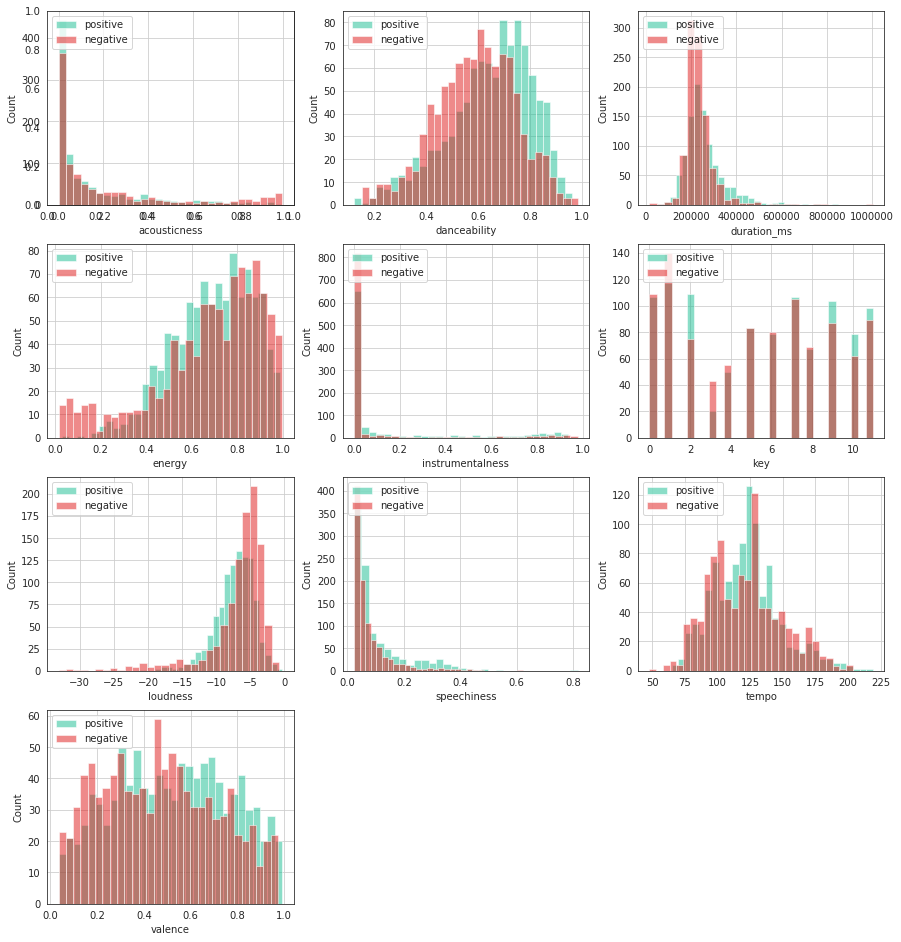

In [116]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['tempo', 'danceability', 'duration_ms', 
                'loudness', 'speechiness', 'valence', 
                'energy', 'acousticness', 'key', 'instrumentalness']
    if colName in features:
        
        pos = data[data['target'] == 1][colName]
        neg = data[data['target'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        pos.hist(alpha = 0.5, bins=30, label='positive')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 0.5, bins=30, label='negative')
        ax.legend(loc='upper left')
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]